In [27]:

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import dask 
import pandas as pd
import xrft 
from scipy.interpolate import griddata

from scipy.ndimage import gaussian_filter as gauss


from pyspec import spectrum as spec
from matplotlib.colors import LogNorm

In [28]:

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listm=glob(path+'*DAY.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[-9:])


path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listt=glob(path+'*DAY.nc');listt.sort()
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt)

In [29]:
plt.rcParams['font.size']=15
plt.rcParams['font.sans-serif']='Arial'
plt.rcParams['font.weight']='bold'

In [30]:
varf

<xarray.Dataset>
Dimensions:               (y: 390, x: 300, lev_M: 49, lev_W: 50, time_counter: 274, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(390, 300), meta=np.ndarray>
  * lev_M                 (lev_M) float32 1.0 2.0 3.0 4.0 ... 47.0 48.0 49.0
  * lev_W                 (lev_W) float32 1.0 2.0 3.0 4.0 ... 48.0 49.0 50.0
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(30,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2011-11-01T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/28)
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    T2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    Q2                    (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINCV                (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    RAINNCV               (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    ...                    ...
    XKHH                  (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    BN2                   (time_counter, lev_M, y, x) float32 dask.array<chunksize=(30, 49, 390, 300), meta=np.ndarray>
    AKMS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    AKHS                  (time_counter, y, x) float32 dask.array<chunksize=(30, 390, 300), meta=np.ndarray>
    EXCH_H                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
    EXCH_M                (time_counter, lev_W, y, x) float32 dask.array<chunksize=(30, 50, 390, 300), meta=np.ndarray>
Attributes: (12/100)
    name:                            Out/wrf_3D_Y2011M11_DAY
    description:                     wrf M grid variables
    title:                           wrf M grid variables
    Conventions:                     CF-1.6
    timeStamp:                       2020-Jul-28 14:17:36 GMT
    uuid:                            b6883739-62d0-4439-ae6e-92fc67aed774
    ...                              ...
    ISLAKE:                          -1
    ISICE:                           24
    ISURBAN:                         1
    ISOILWATER:                      14
    HYBRID_OPT:                      2
    ETAC:                            0.2

In [31]:
xx=np.arange(varf.SST[0,0,:].shape[0])
yy=np.arange(varf.SST[0,:,0].shape[0])


xm1=np.arange(150,210)

xm2=np.arange(140)
ym2=np.arange(200,340)

xm3=np.arange(140)
ym3=np.arange(20,180)

xx1,yy1=np.meshgrid(xx,yy)

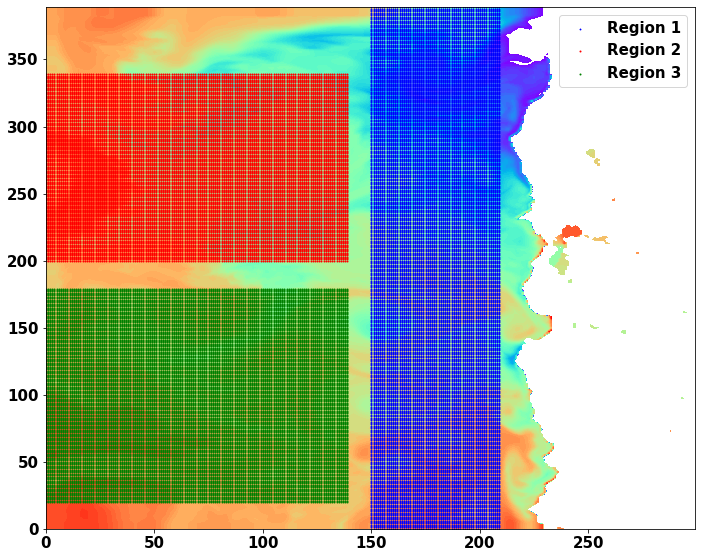

In [50]:

plt.figure(figsize=(10,8))
plt.contourf(xx,yy,varf.SST[0,:,:],levels=np.linspace(283,290,65),cmap='rainbow')
plt.scatter(xx1[:,xm1],yy1[:,xm1],s=1,c='b',marker='*',label='Region 1')
plt.scatter(xx1[ym2,:][:,xm2],yy1[ym2,:][:,xm2],s=1,c='r',label='Region 2')
plt.scatter(xx1[ym3,:][:,xm3],yy1[ym3,:][:,xm3],s=1,c='g',label='Region 3')


plt.legend()
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/2regions/map_regions.png')



In [33]:
'Wind KE'

'Area 1'
b1f = 0.5*(varf.U10[:,:,xm1]**2 + varf.V10[:,:,xm1]**2)
b1t = 0.5*(vart.U10[:,:,xm1]**2 + vart.V10[:,:,xm1]**2)

'Area 2'
b2f= 0.5*(varf.U10[:,ym2,xm2]**2 + varf.V10[:,ym2,xm2]**2)
b2t= 0.5*(vart.U10[:,ym2,xm2]**2 + vart.V10[:,ym2,xm2]**2)

'Area 2'
b3f= 0.5*(varf.U10[:,ym3,xm3]**2 + varf.V10[:,ym3,xm3]**2)
b3t= 0.5*(vart.U10[:,ym3,xm3]**2 + vart.V10[:,ym3,xm3]**2)

dxx=0.013*111e3
dyy=0.013*111e3
 

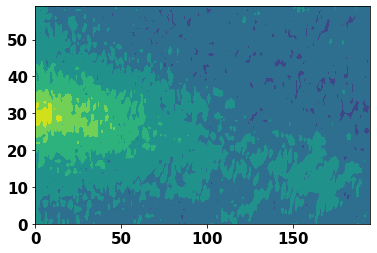

In [34]:
ass=spec.TWODimensional_spec(b1f[0,:,:].T,dyy,dxx)
isoass=spec.calc_ispec(ass.k1,ass.k2,ass.spec)
isoass[0].shape
plt.contourf(np.log10(ass.spec))


In [35]:
'B1'
'''
Isotropic Spec
'''


ISPFULL=np.zeros([b1f.shape[0],2,29])
ISPSMTH=np.zeros([b1t.shape[0],2,29])


for ix in range(b1f.shape[0]):

    spf = spec.TWODimensional_spec(b1f[ix,:,:].T,dxx,dyy)
    spt = spec.TWODimensional_spec(b1t[ix,:,:].T,dxx,dyy)


    ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
    ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)

    ISPFULL[ix,0,:]=ispf[0];
    ISPFULL[ix,1,:]=ispf[1];

    ISPSMTH[ix,0,:]=ispt[0];
    ISPSMTH[ix,1,:]=ispt[1];



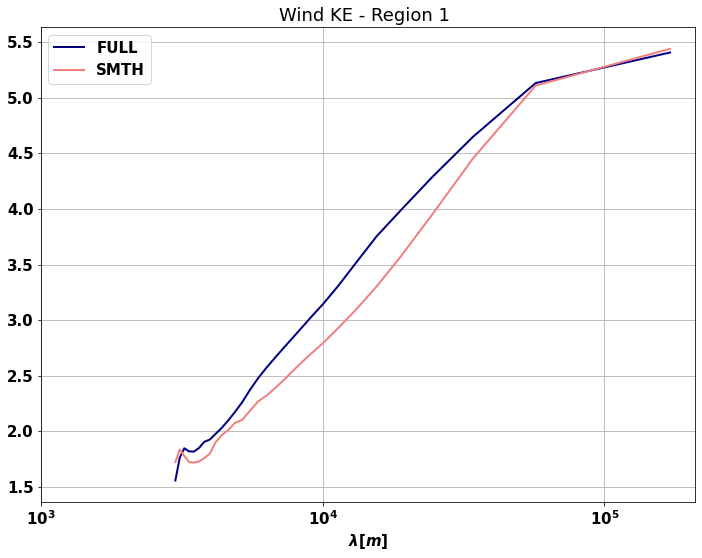

In [36]:
plt.figure(figsize=(10,8))


plt.plot(np.log10(1/np.nanmean(ISPFULL,axis=0)[0]),
        np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/np.nanmean(ISPSMTH,axis=0)[0]),
        np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('Wind KE - Region 1 ')

plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()
plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/2regions/WE_wind_region1.png')




In [37]:
asx=spec.TWODimensional_spec(b2t[0,:,:].T,dyy,dxx)
isoasx=spec.calc_ispec(asx.k1,asx.k2,asx.spec)
isoasx[0].shape
# plt.contourf(np.log10(ass.spec))


(49,)

In [38]:
'B2'

'''
Isotropic Spec
'''


ISPFULL=np.zeros([b2f.shape[0],2,49])
ISPSMTH=np.zeros([b2t.shape[0],2,49])


for ix in range(b2f.shape[0]):

    spf = spec.TWODimensional_spec(b2f[ix,:,:].T,dxx,dyy)
    spt = spec.TWODimensional_spec(b2t[ix,:,:].T,dxx,dyy)


    ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
    ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)

    ISPFULL[ix,0,:]=ispf[0];
    ISPFULL[ix,1,:]=ispf[1];

    ISPSMTH[ix,0,:]=ispt[0];
    ISPSMTH[ix,1,:]=ispt[1];

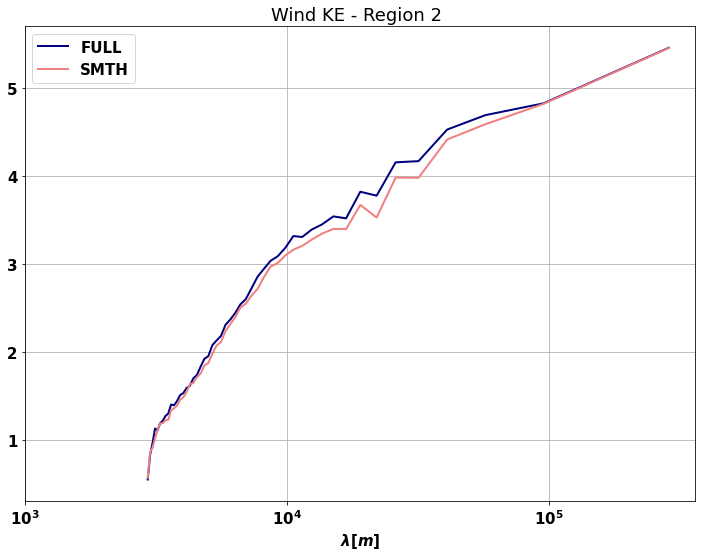

In [39]:
plt.figure(figsize=(10,8))


plt.plot(np.log10(1/np.nanmean(ISPFULL,axis=0)[0]),
        np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/np.nanmean(ISPSMTH,axis=0)[0]),
        np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('Wind KE - Region 2 ')


plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/2regions/WE_wind_region2.png')



In [40]:
asx=spec.TWODimensional_spec(b3t[0,:,:].T,dyy,dxx)
isoasx=spec.calc_ispec(asx.k1,asx.k2,asx.spec)
isoasx[0].shape
# plt.contourf(np.log10(ass.spec))

(52,)

In [41]:
'B3'

'''
Isotropic Spec
'''


ISPFULL=np.zeros([b3f.shape[0],2,52])
ISPSMTH=np.zeros([b3t.shape[0],2,52])


for ix in range(b2f.shape[0]):

    spf = spec.TWODimensional_spec(b3f[ix,:,:].T,dxx,dyy)
    spt = spec.TWODimensional_spec(b3t[ix,:,:].T,dxx,dyy)


    ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
    ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)

    ISPFULL[ix,0,:]=ispf[0];
    ISPFULL[ix,1,:]=ispf[1];

    ISPSMTH[ix,0,:]=ispt[0];
    ISPSMTH[ix,1,:]=ispt[1];

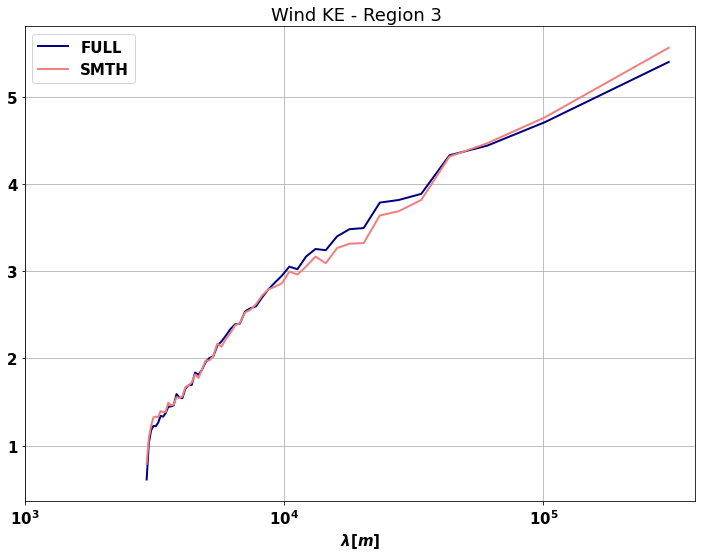

In [42]:
plt.figure(figsize=(10,8))


plt.plot(np.log10(1/np.nanmean(ISPFULL,axis=0)[0]),
        np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/np.nanmean(ISPSMTH,axis=0)[0]),
        np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('Wind KE - Region 3 ')


plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/2regions/WE_wind_region3.png')



In [43]:
'ocean_KE'

'Area 1'
b1f = 0.5*(varf.UOCE[:,:,xm1]**2 + varf.VOCE[:,:,xm1]**2)
b1t = 0.5*(vart.UOCE[:,:,xm1]**2 + vart.VOCE[:,:,xm1]**2)

'Area 2'
b2f= 0.5*(varf.UOCE[:,ym2,xm2]**2 + varf.VOCE[:,ym2,xm2]**2)
b2t= 0.5*(vart.UOCE[:,ym2,xm2]**2 + vart.VOCE[:,ym2,xm2]**2)

'Area 2'
b3f= 0.5*(varf.UOCE[:,ym3,xm3]**2 + varf.VOCE[:,ym3,xm3]**2)
b3t= 0.5*(vart.UOCE[:,ym3,xm3]**2 + vart.VOCE[:,ym3,xm3]**2)

dxx=0.013*111e3
dyy=0.013*111e3
 

In [44]:
'B1'
'''
Isotropic Spec
'''


ISPFULL=np.zeros([b1f.shape[0],2,29])
ISPSMTH=np.zeros([b1t.shape[0],2,29])


for ix in range(b1f.shape[0]):

    spf = spec.TWODimensional_spec(b1f[ix,:,:].T,dxx,dyy)
    spt = spec.TWODimensional_spec(b1t[ix,:,:].T,dxx,dyy)


    ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
    ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)

    ISPFULL[ix,0,:]=ispf[0];
    ISPFULL[ix,1,:]=ispf[1];

    ISPSMTH[ix,0,:]=ispt[0];
    ISPSMTH[ix,1,:]=ispt[1];




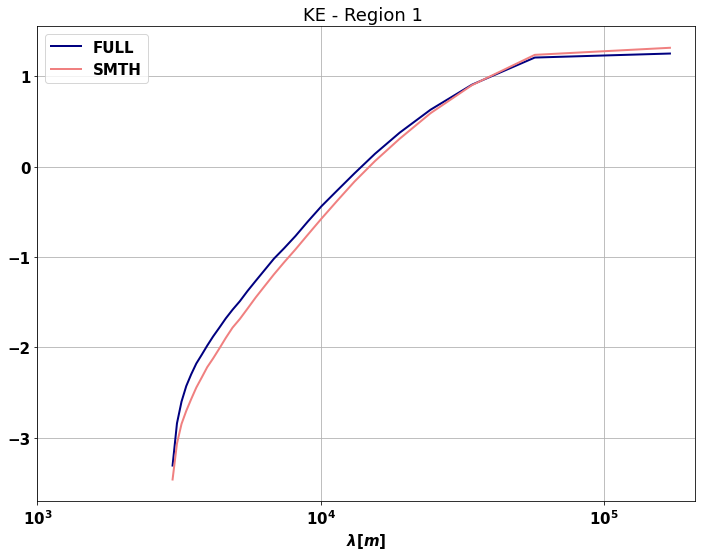

In [45]:
plt.figure(figsize=(10,8))


plt.plot(np.log10(1/np.nanmean(ISPFULL,axis=0)[0]),
        np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/np.nanmean(ISPSMTH,axis=0)[0]),
        np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('KE - Region 1 ')


plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/2regions/KE_region1.png')



In [46]:
'B2'

'''
Isotropic Spec
'''


ISPFULL=np.zeros([b2f.shape[0],2,49])
ISPSMTH=np.zeros([b2t.shape[0],2,49])


for ix in range(b2f.shape[0]):

    spf = spec.TWODimensional_spec(b2f[ix,:,:].T,dxx,dyy)
    spt = spec.TWODimensional_spec(b2t[ix,:,:].T,dxx,dyy)


    ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
    ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)

    ISPFULL[ix,0,:]=ispf[0];
    ISPFULL[ix,1,:]=ispf[1];

    ISPSMTH[ix,0,:]=ispt[0];
    ISPSMTH[ix,1,:]=ispt[1];

In [56]:
np.nanmin(ISPSMTH[0][0])*1000

0.0032887046495194312

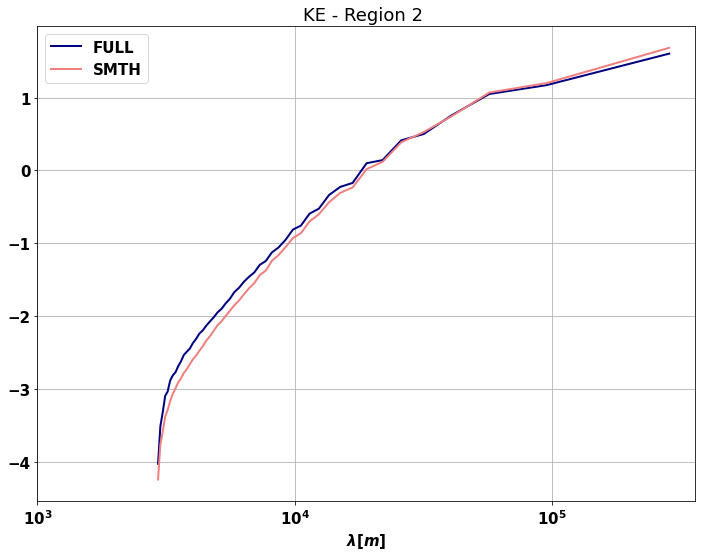

In [47]:
plt.figure(figsize=(10,8))


plt.plot(np.log10(1/np.nanmean(ISPFULL,axis=0)[0]),
        np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/np.nanmean(ISPSMTH,axis=0)[0]),
        np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('KE - Region 2 ')


plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/2regions/KE_region2.png')



In [48]:
'B3'

'''
Isotropic Spec
'''


ISPFULL=np.zeros([b3f.shape[0],2,52])
ISPSMTH=np.zeros([b3t.shape[0],2,52])


for ix in range(b2f.shape[0]):

    spf = spec.TWODimensional_spec(b3f[ix,:,:].T,dxx,dyy)
    spt = spec.TWODimensional_spec(b3t[ix,:,:].T,dxx,dyy)


    ispf=spec.calc_ispec(spf.k1,spf.k2,spf.spec)
    ispt=spec.calc_ispec(spt.k1,spt.k2,spt.spec)

    ISPFULL[ix,0,:]=ispf[0];
    ISPFULL[ix,1,:]=ispf[1];

    ISPSMTH[ix,0,:]=ispt[0];
    ISPSMTH[ix,1,:]=ispt[1];

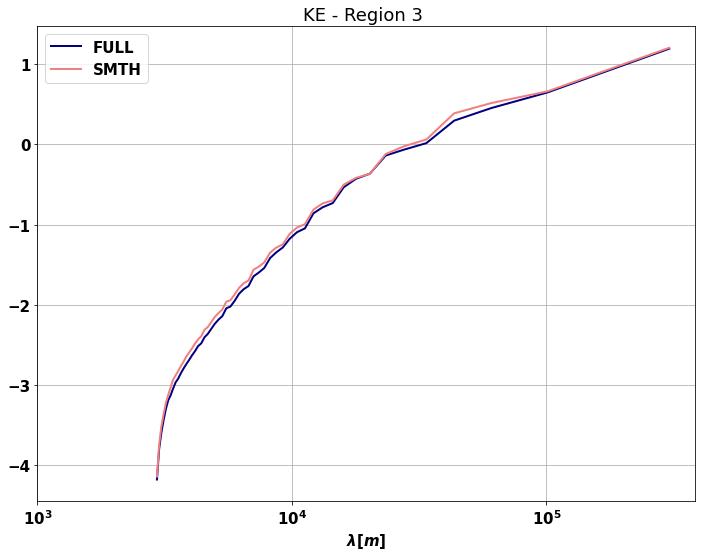

In [49]:
plt.figure(figsize=(10,8))


plt.plot(np.log10(1/np.nanmean(ISPFULL,axis=0)[0]),
        np.log10(np.nanmean(ISPFULL,axis=0)[1][::-1]),label='FULL',linewidth=2,color='navy')

plt.plot(np.log10(1/np.nanmean(ISPSMTH,axis=0)[0]),
        np.log10(np.nanmean(ISPSMTH,axis=0)[1][::-1]),label='SMTH',linewidth=2,color='lightcoral')




plt.legend()

plt.grid()
plt.title('KE - Region 3 ')


plt.xticks(np.array([3,4,5]),[r'10$^3$',r'10$^4$',r'10$^5$'])
#plt.title(np.datetime_as_string(varf.time_counter[xday].data)[:10])
plt.xlabel(r'$\lambda [m]$')

plt.tight_layout()
plt.savefig('/homes/metogra/iufarias/Documents/Scripts/2regions/KE_region3.png')


